In [17]:
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import tensorflow as tf
from picasso import STYLE_LAYERS, CONTENT_LAYERS
from cost_functions import *
from utils.misc_utils import *
from vgg.vgg_model import *
%matplotlib inline

1. Load VGG19 
2. Chose your style and content layers. Uncomment the top to list all layers

In [18]:
img_size = 512
vgg = get_model(img_size=img_size, weights_normalized = True)

#for layer in vgg.layers:
#    print(layer.name)

INPUT_LAYERS = [(vgg.layers[0].name, 1)]

vgg_style_outputs = get_style_model(vgg)
vgg_model_content_outputs = get_content_model(vgg)
inputs_layer_output = get_layer_outputs(vgg, INPUT_LAYERS)

In [ ]:
content_image, style_image, generated_image = load_images("images/sib.jpg", "images/fire.jpg", "output/image_fire800.jpg",  img_size=img_size)

In [20]:
# Assign the content image to be the input of the VGG model.  
# Set a_C to be the hidden layer activation from the layer we have selected
preprocessed_content =  tf.Variable(tf.image.convert_image_dtype(content_image, tf.float32))
a_C = vgg_model_content_outputs(preprocessed_content)
# Assign the input of the model to be the "style" image 
preprocessed_style =  tf.Variable(tf.image.convert_image_dtype(style_image, tf.float32))
a_S = vgg_style_outputs(preprocessed_style)

#content_target = vgg_style_outputs(content_image)  # Content encoder
#style_targets = vgg_style_outputs(style_image)     # Style encoder

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

#@tf.function()
def train_step(generated_image):
    with tf.GradientTape() as tape:
        # In this function you must use the precomputed encoded images a_S and a_C

        
        # Compute a_G as the vgg_style_outputs for the current generated image
        #(1 line)
        a_G_s = vgg_style_outputs(generated_image)
        a_G_c = vgg_model_content_outputs(generated_image)
        
        
        # Compute the style cost
        #(1 line)
        J_style = compute_style_cost(a_S, a_G_s, STYLE_LAYERS)
        
        #(2 lines)
        # Compute the content cost
        J_content = compute_content_cost(a_C,a_G_c)
        
        
        
        # Compute the total cost
        J = total_cost(J_content, J_style, alpha = 40, beta = 4000)
        
        ### END CODE HERE
        
    grad = tape.gradient(J, generated_image)

    optimizer.apply_gradients([(grad, generated_image)])
    generated_image.assign(clip_0_1(generated_image))
    #J_style = compute_style_cost(a_S, a_G_s, STYLE_LAYERS, layer_wise_output=True)
    # For grading purposes
    return J, J_style, J_content

Epoch 0 with J: 6260.32080078125, J_style: 1.559558391571045, J_content: 0.5521910786628723


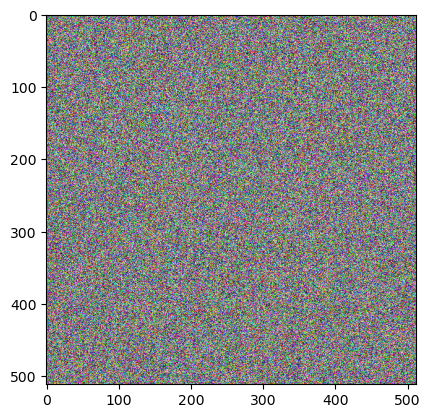

Epoch 25 with J: 5676.67626953125, J_style: 1.4136756658554077, J_content: 0.5493358373641968
Epoch 50 with J: 5162.30126953125, J_style: 1.2851018905639648, J_content: 0.5473335981369019
Epoch 75 with J: 4723.0751953125, J_style: 1.1753095388412476, J_content: 0.5459270477294922
Epoch 100 with J: 4358.7724609375, J_style: 1.084242343902588, J_content: 0.5450758934020996
Epoch 125 with J: 4062.460205078125, J_style: 1.0101696252822876, J_content: 0.5445406436920166
Epoch 150 with J: 3821.4951171875, J_style: 0.9499319791793823, J_content: 0.5441777110099792
Epoch 175 with J: 3622.625, J_style: 0.9002170562744141, J_content: 0.5439231395721436
Epoch 200 with J: 3453.16552734375, J_style: 0.8578537702560425, J_content: 0.5437614321708679


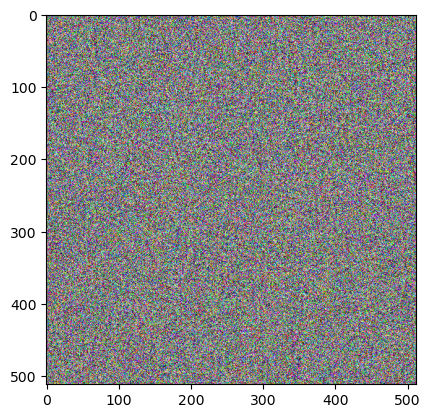

Epoch 225 with J: 3304.641357421875, J_style: 0.8207235336303711, J_content: 0.5436826944351196
Epoch 250 with J: 3172.00830078125, J_style: 0.7875653505325317, J_content: 0.5436699390411377
Epoch 275 with J: 3052.261474609375, J_style: 0.7576282620429993, J_content: 0.5437138080596924
Epoch 300 with J: 2943.701904296875, J_style: 0.7304874658584595, J_content: 0.5437963008880615
Epoch 325 with J: 2844.723388671875, J_style: 0.7057419419288635, J_content: 0.5438926815986633
Epoch 350 with J: 2753.438232421875, J_style: 0.6829195618629456, J_content: 0.5440014004707336
Epoch 375 with J: 2668.6796875, J_style: 0.6617286205291748, J_content: 0.5441287755966187
Epoch 400 with J: 2589.046875, J_style: 0.6418191194534302, J_content: 0.5442612767219543


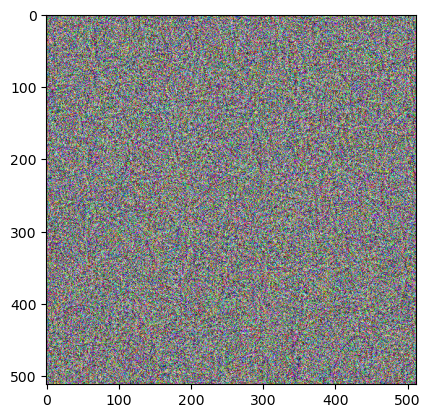

Epoch 425 with J: 2513.562744140625, J_style: 0.6229465007781982, J_content: 0.5444233417510986
Epoch 450 with J: 2441.989501953125, J_style: 0.6050515174865723, J_content: 0.5445853471755981
Epoch 475 with J: 2373.8388671875, J_style: 0.5880125761032104, J_content: 0.544712483882904
Epoch 500 with J: 2308.537841796875, J_style: 0.5716859102249146, J_content: 0.544853687286377
Epoch 525 with J: 2245.752685546875, J_style: 0.5559879541397095, J_content: 0.5450185537338257
Epoch 550 with J: 2185.2197265625, J_style: 0.5408530235290527, J_content: 0.5451921820640564
Epoch 575 with J: 2126.6298828125, J_style: 0.5262035727500916, J_content: 0.5453901290893555
Epoch 600 with J: 2069.9697265625, J_style: 0.5120364427566528, J_content: 0.5456004738807678


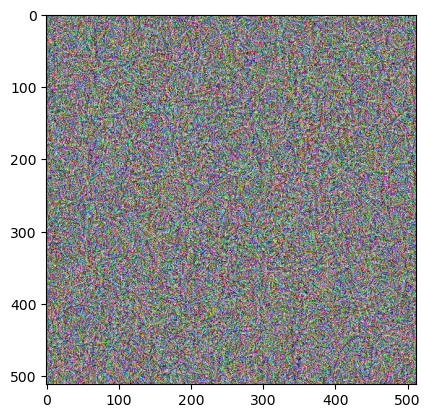

Epoch 625 with J: 2015.0018310546875, J_style: 0.4982922375202179, J_content: 0.5458217263221741
Epoch 650 with J: 1961.8900146484375, J_style: 0.48501208424568176, J_content: 0.5460430979728699
Epoch 675 with J: 1910.8472900390625, J_style: 0.4722493588924408, J_content: 0.5462472438812256
Epoch 700 with J: 1861.597412109375, J_style: 0.4599350094795227, J_content: 0.5464352965354919
Epoch 725 with J: 1813.955322265625, J_style: 0.4480225443840027, J_content: 0.5466271638870239
Epoch 750 with J: 1767.93359375, J_style: 0.43651512265205383, J_content: 0.5468268394470215
Epoch 775 with J: 1723.44677734375, J_style: 0.42539140582084656, J_content: 0.5470263361930847
Epoch 800 with J: 1680.4405517578125, J_style: 0.41463786363601685, J_content: 0.5472249984741211


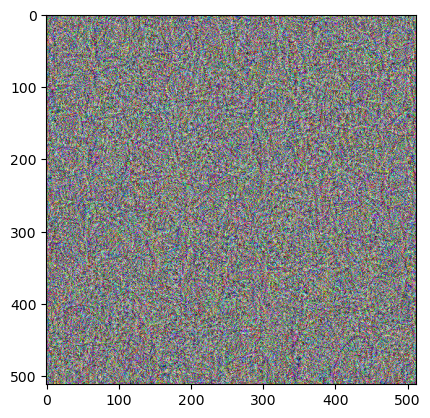

KeyboardInterrupt: 

In [22]:
# Show the generated image at some epochs
# Uncomment to reset the style transfer process. You will need to compile the train_step function again 
epochs = 20000
for i in range(epochs):
    J, J_style, J_content = train_step(generated_image)
    if i % 25 == 0:
        print(f"Epoch {i} with J: {J}, J_style: {J_style}, J_content: {J_content}")
        #for i, layer_cost in enumerate(J_style):
            #print(f"Layer {STYLE_LAYERS[i]} cost: {layer_cost}")
    if i % 400 == 0:
        image = tensor_to_image(generated_image)
        imshow(image)
        image.save(f"output/image_fire{i}.jpg")
        plt.show() 

In [ ]:
a_G_s = vgg_style_outputs(generated_image)
J_style = compute_style_cost(a_S, a_G_s, STYLE_LAYERS, layer_wise_output=True)
for i, layer_cost in enumerate(J_style):
   print(f"Layer {STYLE_LAYERS[i]} cost: {layer_cost}")

print(tf.nn.softmax(J_style))

In [ ]:
# Show the 3 images in a row
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
imshow(content_image[0])
ax.title.set_text('Content image')
ax = fig.add_subplot(1, 3, 2)
imshow(style_image[0])
ax.title.set_text('Style image')
ax = fig.add_subplot(1, 3, 3)
imshow(generated_image[0])
ax.title.set_text('Generated image')
plt.show()